# Imports

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score



# EDA

In [29]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
df.shape

(569, 33)

In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
'''Check if there is missing data'''
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [33]:
''' Dropping unnecessary columns'''
df = df.drop(columns=['Unnamed: 32'])


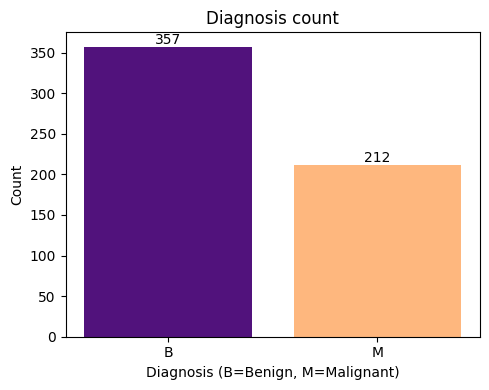

In [ ]:
''' Create a Count plot to display diagnosis'''

# Count classes
counts = df["diagnosis"].value_counts().sort_index() 

# Colors from magma colormap
cmap = plt.cm.magma
colors = cmap(np.linspace(0.25, 0.85, len(counts)))

# Plot
plt.figure(figsize=(5,4))
bars = plt.bar(counts.index, counts.values, color=colors)

# Add value labels on top
for b in bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height, f"{int(height)}",
             ha="center", va="bottom", fontsize=10)

plt.title("Diagnosis count")
plt.xlabel("Diagnosis (B=Benign, M=Malignant)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
'''Counts of unique rows in the "diagnosis" column'''
df["diagnosis"].nunique()

2

In [ ]:
'''Map "diagnosis" values to numeric values(0,1) '''
df["diagnosis"] = df["diagnosis"].map({"B":0,"M":1})

# Building Models

In [47]:
'''Split data into train and test'''
# Split into features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Train/test split (stratify keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
'''Pipeline: scale -> logistic regression'''
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])


In [61]:
'''Prediction and accuracy'''
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Log regression test accuracy: {acc:.3f}")

Log regression test accuracy: 0.965


In [ ]:
''' K Nearest Neighbours model ''' 
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))  # try 3,5,7 later
])

knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print(f"KNN test accuracy: {acc:.3f}")


KNN test accuracy: 0.956


In [59]:
'''Random Forests model'''
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,        
    random_state=42,
    n_jobs=-1
 
)

# Train
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest test accuracy: {acc:.3f}")

Random Forest test accuracy: 0.974


In [63]:
'''Support Vector Machines (SVM) model'''
svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
])

svm_rbf.fit(X_train, y_train)
acc = svm_rbf.score(X_test, y_test)
print(f"SVM (RBF) test accuracy: {acc:.3f}")

SVM (RBF) test accuracy: 0.965


### Which model is the best?

In [67]:
#Define models 
models = {
    "LogReg": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "SVM-RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42))
    ]),
}


In [68]:
# 1) CV accuracy (stability)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=cv, scoring="accuracy")
    print(f"{name:12s} CV acc: {scores.mean():.3f} ± {scores.std():.3f}")

# 2) Fit on train, evaluate on test with richer metrics
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    # probabilities if supported
    try:
        y_proba = m.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except Exception:
        auc = None
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {name} ===")
    print(f"Test accuracy: {acc:.3f}", f"ROC-AUC: {auc:.3f}" if auc is not None else "")
    print("Confusion matrix:\n", cm)
    # Focus on malignant (1) row in the report
    print(classification_report(y_test, y_pred, digits=3))

LogReg       CV acc: 0.972 ± 0.017
KNN          CV acc: 0.965 ± 0.020
RandomForest CV acc: 0.951 ± 0.014
SVM-RBF      CV acc: 0.977 ± 0.016

=== LogReg ===
Test accuracy: 0.965 ROC-AUC: 0.996
Confusion matrix:
 [[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0      0.959     0.986     0.973        72
           1      0.975     0.929     0.951        42

    accuracy                          0.965       114
   macro avg      0.967     0.957     0.962       114
weighted avg      0.965     0.965     0.965       114


=== KNN ===
Test accuracy: 0.956 ROC-AUC: 0.983
Confusion matrix:
 [[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0      0.947     0.986     0.966        72
           1      0.974     0.905     0.938        42

    accuracy                          0.956       114
   macro avg      0.961     0.945     0.952       114
weighted avg      0.957     0.956     0.956       114


=== RandomForest ===
Test ac

# Summary

### Models & test accuracy

- Logistic Regression: 0.965 (ROC-AUC 0.996)

- KNN (k=5): 0.956 (ROC-AUC 0.983)

- andom Forest: 0.974 (ROC-AUC 0.994)

- SVM (RBF): 0.965 (ROC-AUC 0.995)

### Cross-validation (5-fold, accuracy mean ± std)

- SVM-RBF: 0.977 ± 0.016 (best generalization)

- LogReg: 0.972 ± 0.017

- KNN: 0.965 ± 0.020

- Random Forest: 0.951 ± 0.014

### Confusion-matrix takeaways

- Malignant recall ≈ 0.929 for LogReg, RF, SVM; KNN lower (0.905).

- Random Forest had zero false positives on this test split.

### Conclusion

- While Random Forest had the highest test accuracy on this split, SVM (or Logistic Regression) looks most reliable overall based on cross-validation and ROC-AUC.

- For medical context, I would choose SVM-RBF (or LogReg) and, if needed, adjust the decision threshold to improve malignant recall.